Link to the dataset:
https://drive.google.com/drive/folders/13YJkoRH9r-XdTLA-CyqhPAeF-53Jf6RN?usp=drive_link.


### **Progress Report**

**Introduction**

This project aims to analyze the detailed dataset of the vaginal microbiome from pregnant women to explore potential indicators of preterm birth, which is medically defined as birth before the completion of 37 weeks of gestation. Given the significant prevalence of preterm births globally and its associated health risks for infants, our academic pursuit is to derive meaningful insights from the data that could reveal underlying biological patterns or correlations.

Our project's scope has narrowed, focusing more closely on age-related analysis and the role of microbial diversity in preterm births. Some aspects initially considered, such as certain demographic factors, have been set aside to make the study more focused on biologically relevant features.


Goal: Develop a ML or deep NN model for preterm prediction. Determine the risk of preterm birth (delivery <37 weeks vs. >=37 weeks)

Null Hypothesis: Age does not have an impact on pre-term birth.

Alternate Hypothesis: Age has an impact on pre-term birth.



Link to our GitHub repository:

https://github.com/uic-ds-fall-2023/class-project-data-explorers




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import shapiro, mannwhitneyu, ttest_ind, chi2_contingency
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# colab-specific file access
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/Project

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/Project


In [ ]:
# getting the data from alpha_diveristy table
alpha_diversity = pd.read_csv('alpha_diversity.csv')
#cst_valencia_w_taxons = pd.read_csv('cst_valencia_w_taxons.csv')
#cst_valencia = pd.read_csv('cst_valencia.csv')
#krd_distance_long = pd.read_csv('krd_distance_long.csv')
#krd_distance_wide = pd.read_csv('krd_distance_wide.csv')
metadata_normalized = pd.read_csv('metadata_normalized.csv')
metadata = pd.read_csv('metadata.csv')
#phylotype_nreads_1e_1 = pd.read_csv('phylotype_nreads.1e_1.csv')
#phylotype_nreads_1e_0 = pd.read_csv('phylotype_nreads.1e0.csv')
#phylotype_nreads_5e_1 = pd.read_csv('phylotype_nreads.5e_1.csv')
#phylotype_relabd_1e_1 = pd.read_csv('phylotype_relabd.1e_1.csv')
#phylotype_relabd_1e_0 = pd.read_csv('phylotype_relabd.1e0.csv')
#phylotype_relabd_5e_1 = pd.read_csv('phylotype_relabd.5e_1.csv')


In [ ]:
alpha_diversity.head()

,specimen,shannon,inv_simpson,bwpd,phylo_entropy,quadratic,unrooted_pd,rooted_pd
0,A00001-05,1.00000,1.00000,0.00000,-0.00000,0.000000,0.00000,2.53935
1,A00002-01,1.96362,1.81277,2.62894,1.31887,0.876314,3.94341,4.14816
2,A00003-02,1.00000,1.00000,0.00000,-0.00000,0.000000,0.00000,2.62632
3,A00004-08,1.00000,1.00000,0.00000,-0.00000,0.000000,0.00000,1.83870
4,A00004-12,6.94884,4.07385,2.78896,3.13422,1.219900,15.51850,15.58460


In [ ]:
metadata

,project,specimen,participant_id,was_term,delivery_wk,collect_wk,race,age,NIH Racial Category,NIH Ethnicity Category,was_preterm,was_early_preterm
0,A,A00001-05,A00001,False,38.0,33.0,American Indian,Unknown,American Indian or Alaska Native,Unknown,False,False
1,A,A00002-01,A00002,False,40.0,38.0,White,Unknown,White,Unknown,False,False
2,A,A00003-02,A00003,False,40.0,30.0,Asian-Japanese,Unknown,Asian,Unknown,False,False
3,A,A00004-08,A00004,False,40.0,27.0,White,Unknown,White,Unknown,False,False
4,A,A00004-12,A00004,False,40.0,29.0,White,Unknown,White,Unknown,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3573,J,J00111-01,J00111,False,40.0,17.0,Caucasian,27,White,Unknown,False,False
3574,J,J00112-01,J00112,False,39.0,19.0,Caucasian,27,White,Unknown,False,False
3575,J,J00113-01,J00113,False,41.0,16.0,Caucasian,32,White,Unknown,False,False
3576,J,J00115-01,J00115,False,42.0,18.0,Caucasian,35,White,Unknown,False,False


The metadata contains all the details of the conducted experiment, with various columns including 'project', 'specimen', 'participant_id', 'was_term', 'delivery_wk', 'collect_wk', 'race', 'age', 'NIH Racial Category', 'NIH Ethnicity Category', 'was_preterm', and 'was_early_preterm'. In light of our hypothesis that "Age does not have an impact on pre-term birth," we have streamlined the dataset by removing columns unnecessary for our analysis. This included the deletion of demographic columns like 'NIH Racial Category' and 'NIH Ethnicity Category'. Additionally, we refined our approach to focus on the influence of maternal age and the incidence of preterm births.

During the data cleaning process, ages that were not specified and labeled as 'Unknown' were converted to NaN values and then removed to ensure the integrity of our age-related analysis. We then narrowed down the dataset to include only the most recent samples collected before the 37th week of gestation, aligning the microbiome data with the critical timeframe relevant to our study of preterm birth risks.


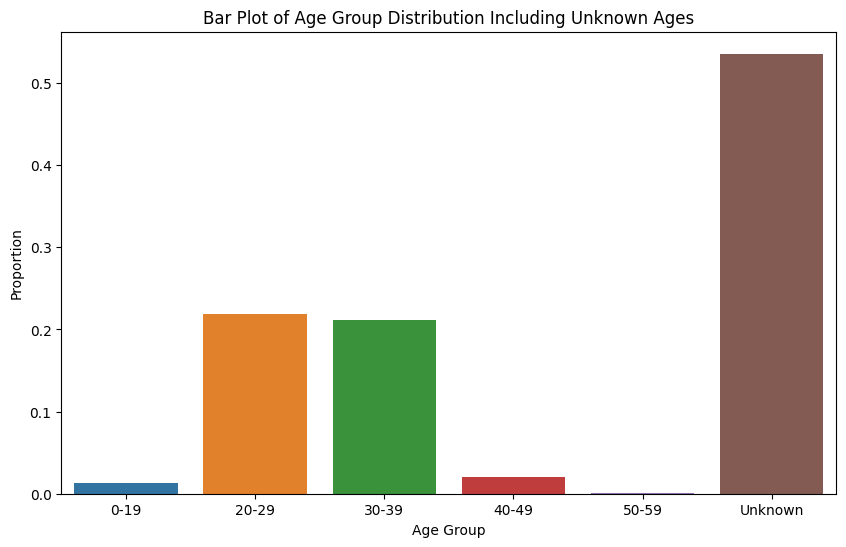

In [ ]:
df1 = metadata
# Handle missing values for 'age' by replacing them with 'Unknown'
df1['age'].replace('Unknown', value=np.nan, inplace=True)  # Replace 'Unknown' with NaN for conversion
df1['age'] = pd.to_numeric(df1['age'], errors='coerce')  # Convert age to numeric, coercing errors to NaN
df1['age_group'] = pd.cut(df1['age'], bins=[0, 20, 30, 40, 50, 60],
                         right=False, labels=['0-19', '20-29', '30-39', '40-49', '50-59'])  # Bin ages into groups
df1['age_group'] = df1['age_group'].cat.add_categories(['Unknown'])
df1['age_group'].fillna('Unknown', inplace=True)  # Assign 'Unknown' to NaN values

# Now let's plot the bar plot including the 'Unknown' age values
plt.figure(figsize=(10, 6))
age_group_counts = df1['age_group'].value_counts(normalize=True).sort_index()
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.title('Bar Plot of Age Group Distribution Including Unknown Ages')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.show()


The bar plot displays the proportions of the dataset's participants across different age groups, with a specific category for those whose ages are not known ('Unknown'). The x-axis represents the age groups, typically binned into ranges like '0-19', '20-29', '30-39', '40-49', '50-59', and 'Unknown'. The y-axis shows the proportion of participants that fall into each of these age groups.

Each bar in the plot corresponds to an age group, with the bar's height indicating the proportion of the dataset's participants in that group. For instance, if the '20-29' age group has a bar that is twice as tall as the '30-39' group, it means that the proportion of participants aged 20-29 is double that of those aged 30-39 in the dataset.

The 'Unknown' category has its own bar, which is particularly informative. The height of this bar indicates the proportion of the dataset for which age information is missing. This is an important aspect of the data to consider, as a significant proportion of 'Unknown' values could affect the reliability of any age-related analysis or conclusions drawn from the dataset.

By providing a clear visual comparison of the different age groups, this bar plot helps identify which age ranges are most prevalent within the study and the extent of missing age information, which might impact subsequent analyses that are dependent on age data.

**Cleaning Data and Preprocessing (Done by Victor & Ricardo):**

In [ ]:
cleanData = metadata[metadata['age'] != 'Unknown']
columnsDelete = ['project', 'NIH Racial Category', 'NIH Ethnicity Category']

updatedData = cleanData.drop(columns=columnsDelete)

df = updatedData
# Data cleaning: Convert 'age' to numeric and create 'age_group' categories
df['age'] = pd.to_numeric(df['age'], errors='coerce')
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55]
labels = ['16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [ ]:
# Filter the dataset for samples collected before week 37 and get the latest sample for each participant
pre_week_37_df = df[df['collect_wk'] < 37]
sorted_df = pre_week_37_df.sort_values(by=['participant_id', 'collect_wk'], ascending=[True, False])
latest_samples_df = sorted_df.drop_duplicates(subset='participant_id')


We limited our analysis to the latest sample collected before week 37 of pregnancy for each participant. The rationale for using 'collect_wk' instead of 'delivery_wk' is rooted in the focus of the study. By focusing on 'collect_wk', we ensure that our analysis is based on the condition of the participant and the sample status before the onset of full-term labor (which is typically around week 37). This can be particularly important if the purpose is to predict or understand factors that contribute to pre-term labor or other conditions before full-term delivery. Additionally, 'delivery_wk' might not be available or accurately known for all records, especially if the delivery occurred unexpectedly or outside of a clinical setting.

**EDA and Visualization: (Done by Kalpkumar & Naivik)**

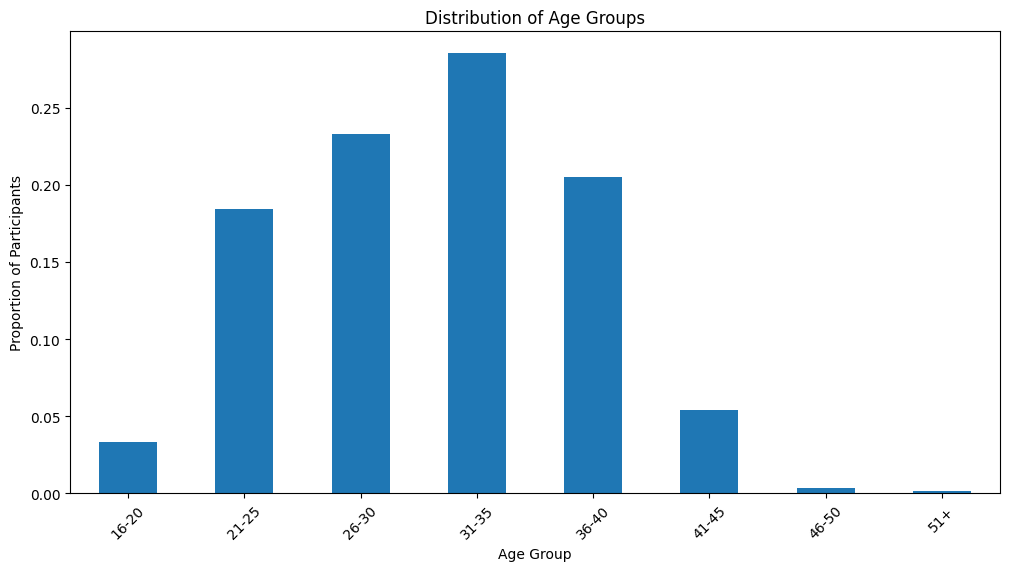

In [ ]:
# Exploratory Data Analysis (EDA) with visualization
# Distribution of Age Groups
plt.figure(figsize=(12, 6))
age_group_dist = latest_samples_df['age_group'].value_counts(normalize=True).sort_index()
age_group_dist.plot(kind='bar')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Participants')
plt.xticks(rotation=45)
plt.show()

This bar chart illustrates the distribution of age groups among participants in a birth data study. The age groups are divided into seven categories: '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', and '51+'. The y-axis represents the proportion of participants in each age group relative to the total number of participants in the study.

From the chart, we can observe that:

The '31-35' age group has the highest proportion of participants, suggesting that individuals in this age range are the most represented in the study population.
The second and third most represented age groups are '26-30' and '36-40', respectively.
The '46-50' and '51+' age groups have the smallest proportions, indicating fewer participants in these age ranges.


 This bar chart helps to quickly assess which age groups are most represented in the dataset and may also provide initial insights into age-related patterns regarding pre-term birth.

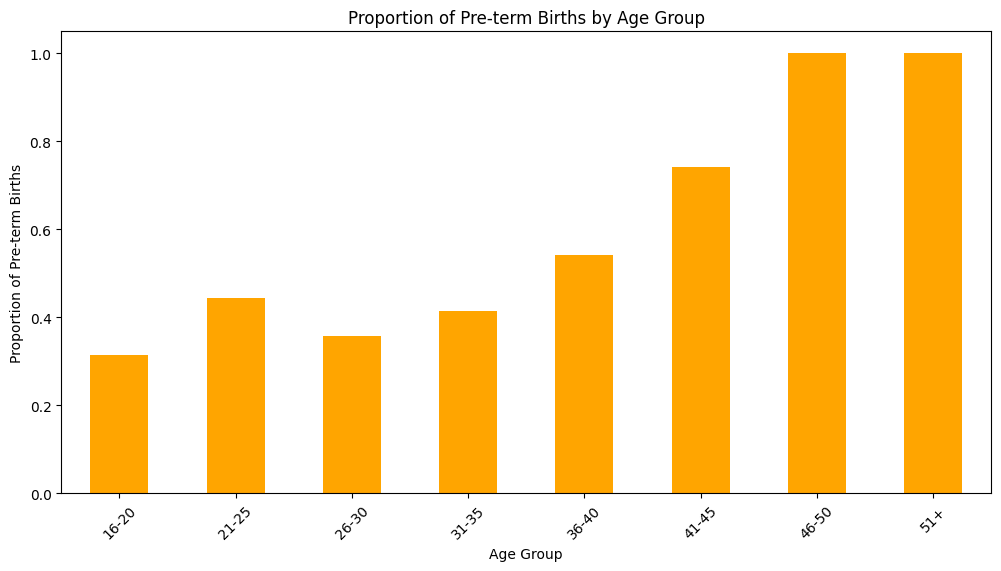

In [ ]:
# Proportion of Pre-term Births by Age Group
plt.figure(figsize=(12, 6))
preterm_by_age = latest_samples_df.groupby('age_group')['was_preterm'].mean().sort_index()
preterm_by_age.plot(kind='bar', color='orange')
plt.title('Proportion of Pre-term Births by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Pre-term Births')
plt.xticks(rotation=45)
plt.show()

The Proportion of Pre-term Births by Age Group visualization aims to explore the relationship between age and the incidence of pre-term births. It can suggest whether age is a factor in pre-term birth rates and, if so, which age groups are most at risk. This is particularly relevant for testing hypotheses about age as a risk factor and can inform healthcare providers about which age groups may require more attention or intervention.

Both visualizations provide a foundation for the hypothesis testing that age may have an impact on pre-term birth rates. By visualizing the data before conducting any statistical tests or machine learning analyses, we can better understand the data's structure and identify any patterns or anomalies that may exist.

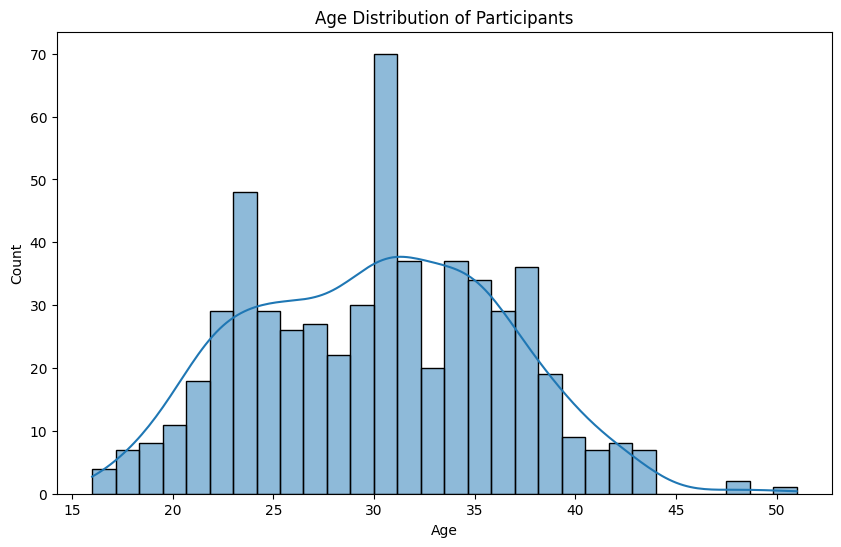

In [ ]:
# Histogram of ages
plt.figure(figsize=(10, 6))
sns.histplot(data=latest_samples_df, x='age', bins=30, kde=True)
plt.title('Age Distribution of Participants')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

This histogram provides a visual representation of the distribution of ages among participants. It helps to understand the central tendency, dispersion, and the shape of the age distribution. By using kernel density estimation (KDE), it also gives an idea of the probability density of ages, highlighting the most common ages within the dataset.

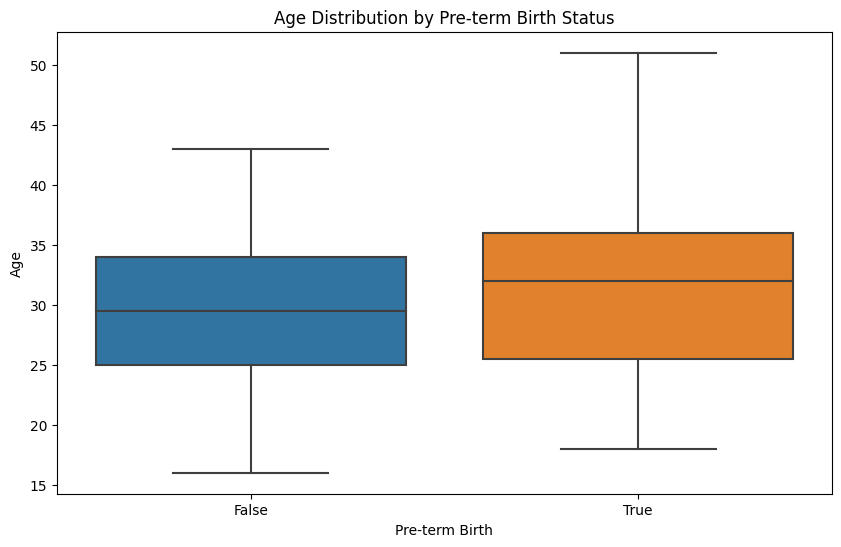

In [ ]:
# Boxplot comparing age distribution between pre-term and full-term births
plt.figure(figsize=(10, 6))
sns.boxplot(x='was_preterm', y='age', data=latest_samples_df)
plt.title('Age Distribution by Pre-term Birth Status')
plt.xlabel('Pre-term Birth')
plt.ylabel('Age')
plt.show()

A boxplot will compare the age distribution between two groups: those who had pre-term births and those who did not. This visualization can reveal differences in the median age, the spread of the ages (interquartile range), and any potential outliers. It's particularly useful for spotting differences in age distribution related to pre-term birth status.

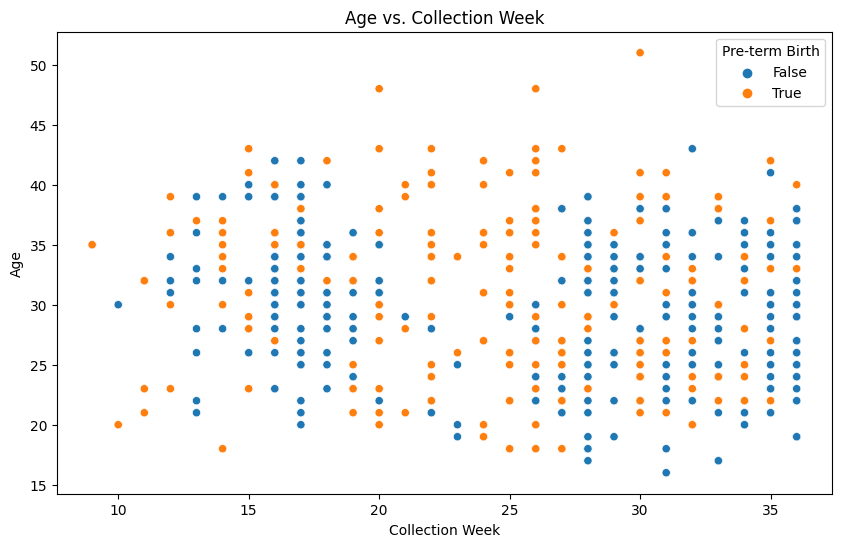

In [ ]:
# Scatter plot of age versus collection week
plt.figure(figsize=(10, 6))
sns.scatterplot(x='collect_wk', y='age', data=latest_samples_df, hue='was_preterm')
plt.title('Age vs. Collection Week')
plt.xlabel('Collection Week')
plt.ylabel('Age')
plt.legend(title='Pre-term Birth')
plt.show()

The scatter plot visualizes the relationship between participant age and the gestational week of sample collection, with a clear distinction between pre-term and full-term births. The data points, representing individual samples, are spread across a range of ages and collection weeks without apparent clustering, suggesting no strong correlation between age and the timing of sample collection. Pre-term births, highlighted in orange, are interspersed throughout the plot, occurring across the full spectrum of ages and collection weeks. This dispersion indicates that within the dataset, pre-term birth outcomes are not predominantly associated with a specific age group or collection period prior to week 37. The absence of outliers and even distribution of points across the plot suggest that pre-term birth is a complex outcome likely influenced by multiple factors beyond just maternal age or the gestational age at the time of sample collection.

<ipython-input-58-94992cd772e3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = latest_samples_df.corr()


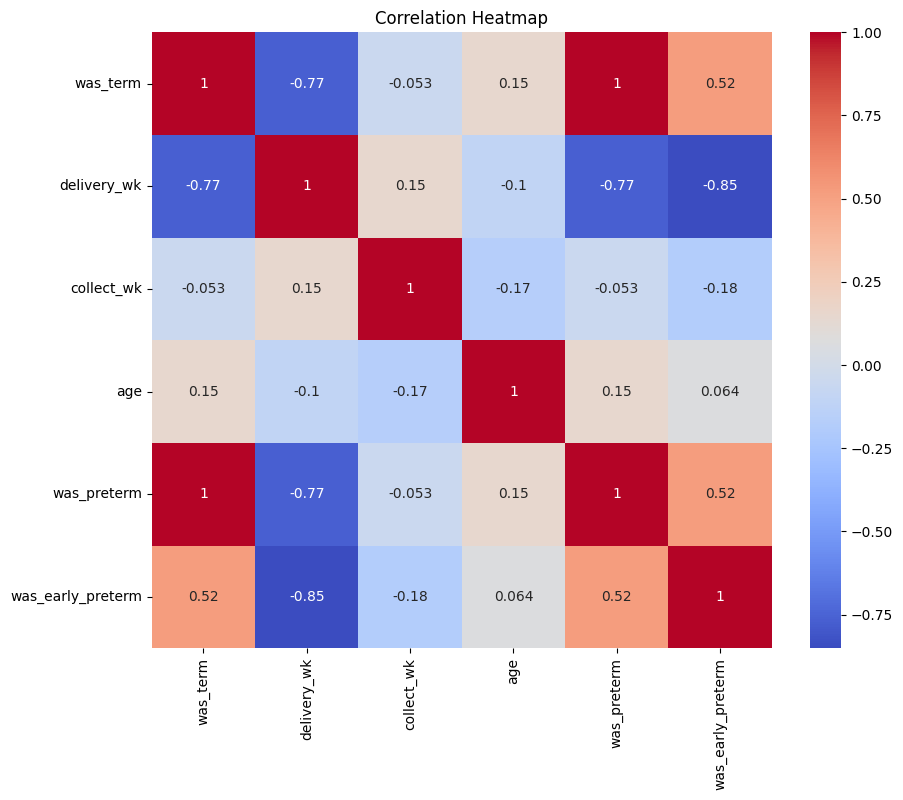

In [ ]:
# Heatmap of correlations between numerical variables
plt.figure(figsize=(10, 8))
corr_matrix = latest_samples_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The heatmap visualizes the correlation coefficients between several variables related to childbirth. Notably, 'was_term' and 'delivery_wk' exhibit a strong negative correlation, implying that full-term births typically occur later in the gestational timeline. In contrast, 'was_preterm' has a moderate positive correlation with 'age', suggesting a slight increase in pre-term births with maternal age. There is also a robust negative correlation between 'was_preterm' and 'delivery_wk', confirming that pre-term births happen earlier in pregnancy. Similarly, 'was_early_preterm' is strongly negatively correlated with 'delivery_wk', indicating that early pre-term births are associated with significantly earlier delivery. The positive correlation between 'was_preterm' and 'was_early_preterm' suggests common factors may influence both pre-term and early pre-term births. Other variables show weaker correlations, suggesting less direct relationships.

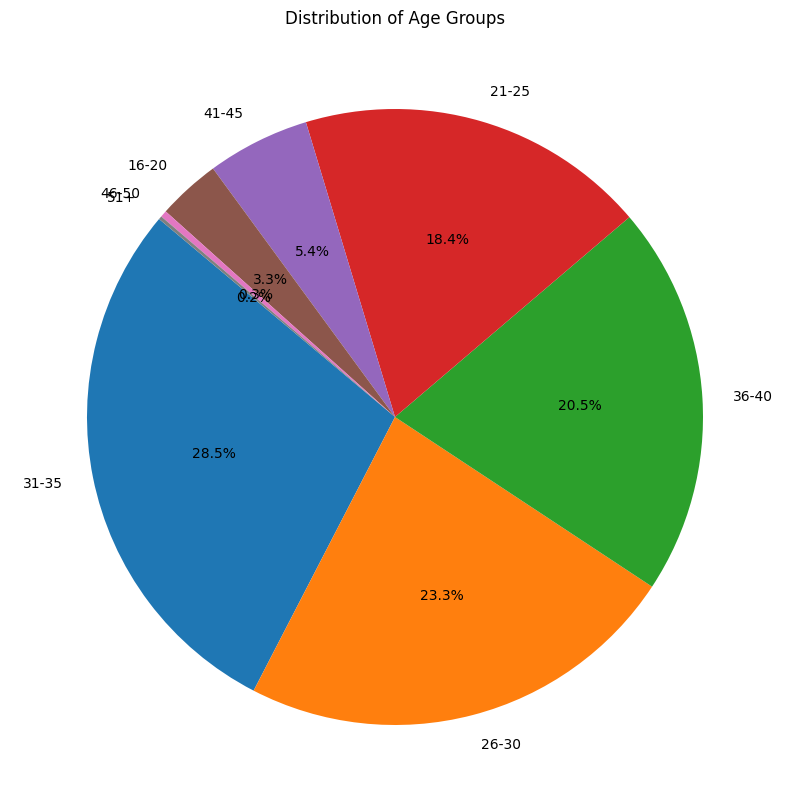

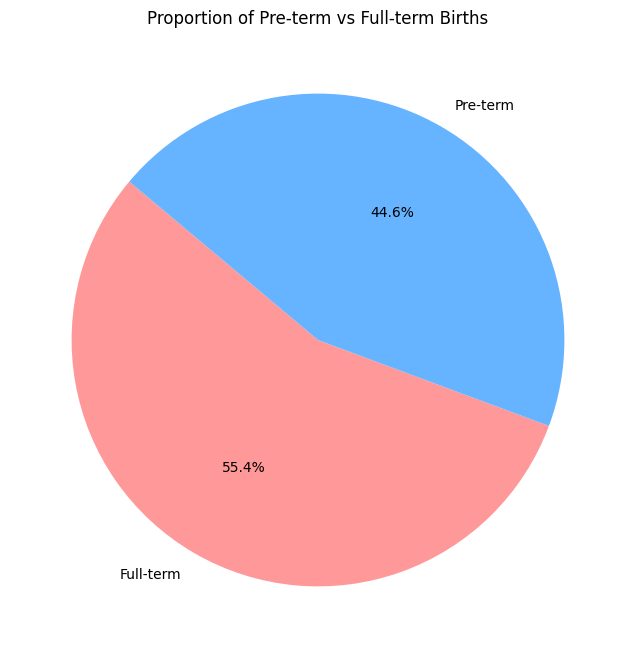

In [ ]:
# Pie Chart of Age Group Distribution
age_group_counts = latest_samples_df['age_group'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Age Groups')
plt.show()

# Pie Chart of Pre-term vs Full-term Births
preterm_counts = latest_samples_df['was_preterm'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(preterm_counts, labels=['Full-term', 'Pre-term'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Pre-term vs Full-term Births')
plt.show()

The 1st pie chart provides a clear and immediate sense of the relative sizes of the age groups. Each 'slice' represents a different age group, and the size of the slice is proportional to the number of participants in that group. This visualization is useful for identifying the most and least common age groups at a glance.

By illustrating the overall proportion of pre-term births, this chart can quickly convey the prevalence of pre-term births within the study population. It can help to set the stage for more in-depth analyses by providing a fundamental understanding of the dataset's composition regarding the outcome variable.

**p-value Testing**

In [ ]:
from scipy.stats import pearsonr

df2 = metadata

# Remove any infinite or NaN values from the data
df2 = df2.replace([np.inf, -np.inf], np.nan).dropna(subset=['age', 'was_preterm'])


# List of variables to test
variables = ['was_term', 'delivery_wk', 'collect_wk', 'age', 'was_preterm', 'was_early_preterm']

# Perform the point-biserial correlation test
corr, p_value = pearsonr(df2['age'], df2['was_preterm'])

# Output the results
print(f"Correlation coefficient: {corr}")
print(f"P-value: {p_value}")

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis. There is a statistically significant correlation between age and pre-term birth.")
else:
    print("We fail to reject the null hypothesis. There is no statistically significant correlation between age and pre-term birth.")

Correlation coefficient: 0.12611568909493454
P-value: 2.514432169887928e-07
We reject the null hypothesis. There is a statistically significant correlation between age and pre-term birth.



The output from the correlation test indicates a correlation coefficient of approximately 0.126, which suggests a weak positive correlation between age and the incidence of pre-term birth. In other words, as age increases, there is a slight tendency for the risk of pre-term birth to increase as well. However, the strength of this relationship is not strong based on the correlation coefficient value.

The p-value is approximately (2.51 * 10^{-7}), which is much smaller than the commonly used significance level of 0.05. This low p-value indicates that the observed correlation is statistically significant. In statistical terms, the probability of observing such a correlation by chance, if there were actually no correlation in the population, is extremely low.

Given this result, we would reject the null hypothesis, which stated that there is no correlation between age and pre-term birth. By rejecting the null hypothesis, we are supporting the alternative hypothesis that there is indeed a correlation between age and the likelihood of pre-term birth.

It is important to note that while the correlation is statistically significant, the actual correlation is weak. This implies that while age can be considered a factor in the incidence of pre-term birth, it is not a strong predictor on its own. There are likely other factors at play that, when combined with age, would provide a more comprehensive understanding of the risks for pre-term birth.

**PCA Plots of taxanomy features: (Done by Ricardo and Tina)**

Microbiome data is a comprehensive representation of the microbial communities residing in a particular environment, and it can be analyzed and characterized at various taxonomic levels, including species, genus, and family. At the genus level, microbiome data provides insights into groups of closely related microorganisms that share common traits, allowing for a more detailed understanding of the composition and diversity within a community. Moving to the species level refines the analysis, providing information about specific microbial entities capable of interbreeding. Furthermore, exploring microbiome data at the family level offers a broader perspective, grouping together related genera and highlighting shared evolutionary characteristics. The relationship between these taxonomic levels reflects the hierarchical nature of biological classification, where species make up genera, and genera constitute families. In this project, we possess microbiome data categorized at three distinct taxonomic levels: species, genus, and family. Utilizing Principal Component Analysis (PCA) plots, our goal is to delve into each dataset to select one that demonstrates more separation between classes for the final model.

**PCA Plot at Species**


In [ ]:
#PCA plot at species level:
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
scaler = StandardScaler()
metadata = pd.read_csv('metadata.csv')
microbiome = pd.read_csv('taxonomy_relabd.species.csv')
mergedDf = pd.merge(microbiome, metadata, on='specimen', how='left').reset_index(drop=True)

label = mergedDf[['was_term']]

specimenCol = microbiome[['specimen']]
microbiome = microbiome.iloc[:,1:]

scaler.fit(microbiome)
# Step 2: Transform the training set
scaled_microbiome = scaler.transform(microbiome)

pca = PCA()
components = pca.fit_transform(scaled_microbiome)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_[0:5] * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(5),
    color=np.array(label['was_term'])
)

fig.update_traces(diagonal_visible=False)

# Set the size of the plot
fig.update_layout(
    title="PCA Plot at Species Level",
    width=1000,  # Set the width of the plot
    height=1000  # Set the height of the plot
)

fig.show()

**PCA Plot at genus**


In [ ]:

from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
scaler = StandardScaler()
metadata = pd.read_csv('metadata.csv')
microbiome = pd.read_csv('taxonomy_relabd.genus.csv')
mergedDf = pd.merge(microbiome, metadata, on='specimen', how='left').reset_index(drop=True)

label = mergedDf[['was_term']]

specimenCol = microbiome[['specimen']]
microbiome = microbiome.iloc[:,1:]

scaler.fit(microbiome)
# Step 2: Transform the training set
scaled_microbiome = scaler.transform(microbiome)

pca = PCA()
components = pca.fit_transform(scaled_microbiome)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_[0:5] * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(5),
    color=np.array(label['was_term'])
)

fig.update_traces(diagonal_visible=False)

# Set the size of the plot
fig.update_layout(
    title="PCA Plot at Genus Level",
    width=1000,  # Set the width of the plot
    height=1000  # Set the height of the plot
)

fig.show()

**PCA Plot at family**


In [ ]:
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
scaler = StandardScaler()
metadata = pd.read_csv('metadata.csv')
microbiome = pd.read_csv('taxonomy_relabd.family.csv')
mergedDf = pd.merge(microbiome, metadata, on='specimen', how='left').reset_index(drop=True)

label = mergedDf[['was_term']]

specimenCol = microbiome[['specimen']]
microbiome = microbiome.iloc[:,1:]

scaler.fit(microbiome)
# Step 2: Transform the training set
scaled_microbiome = scaler.transform(microbiome)

pca = PCA()
components = pca.fit_transform(scaled_microbiome)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_[0:5] * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(5),
    color=np.array(label['was_term'])
)

fig.update_traces(diagonal_visible=False)

# Set the size of the plot
fig.update_layout(
    title="PCA Plot at Family Level",
    width=1000,  # Set the width of the plot
    height=1000  # Set the height of the plot
)

fig.show()


The presence of outliers in the data is impeding our ability to achieve a clear visualization and assess the distinctiveness of classes. In response, we ran one of our machine learning models, which is SVM, on all three levels and chose the data level with higher accuracy, which is family.(analysis is represented in the following cells)

**Machine Learning Model: (Done by Tina)**

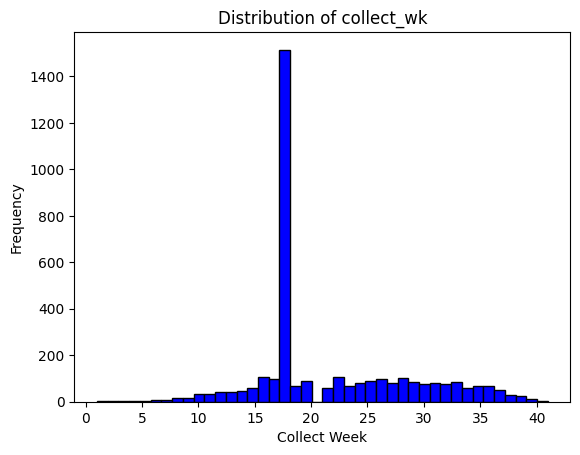

In [ ]:
import matplotlib.pyplot as plt
plt.hist(metadata['collect_wk'], bins=42, color='blue', edgecolor='black')

# Set the title for the histogram
plt.title('Distribution of collect_wk')

# Add labels and other customizations if needed
plt.xlabel('Collect Week')
plt.ylabel('Frequency')

plt.show()
# add explanation

In [ ]:
microbiome = pd.read_csv('taxonomy_relabd.family.csv')


This histogram depicts the distribution of collected weeks for the provided samples. It is noteworthy that preterm births, defined as occurrences before week 37. Consequently, we will refine our dataset by retaining only those samples where the collection week is less than 37.

Text(0.5, 1.0, 'Histogram of number of samples for each project before filtering')

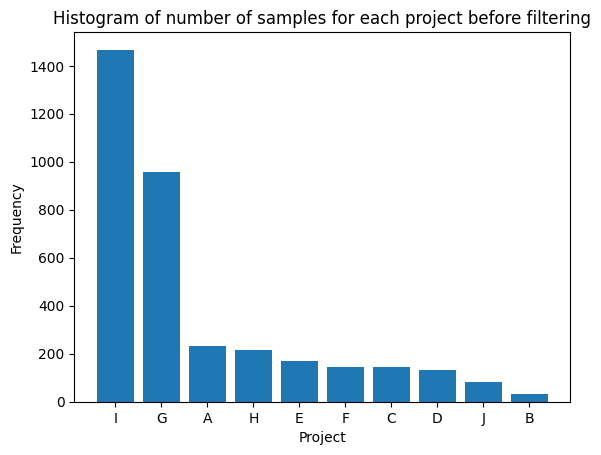

In [ ]:
# visualization of projects: frequency of samples in each project after filtering:
plt.bar(metadata['project'].value_counts().index, metadata['project'].value_counts())
plt.xlabel('Project')
plt.ylabel('Frequency')
plt.title('Histogram of number of samples for each project before filtering')


In [ ]:
filteredMetadata= metadata[metadata['collect_wk'] < 37].groupby('participant_id').apply(lambda group: group[group['collect_wk'] == group['collect_wk'].max()])

Text(0.5, 1.0, 'Histogram of number of samples for each project After filtering')

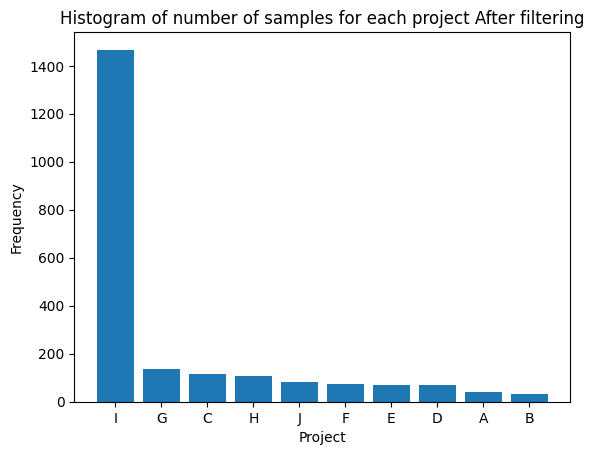

In [ ]:
plt.bar(filteredMetadata['project'].value_counts().index, filteredMetadata['project'].value_counts())
plt.xlabel('Project')
plt.ylabel('Frequency')
plt.title('Histogram of number of samples for each project After filtering')

**Number of samples before and after filtering**

Out of the initial pool of 3,578 samples, 1,382 samples were filtered resulting in a final dataset comprising 2,196 samples.

Text(0.5, 1.0, 'Bar Chart with Percentage for True/False Values for preterm lable')

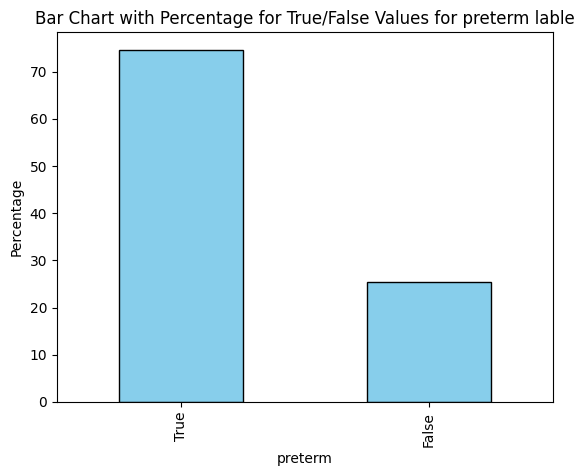

In [ ]:

percentage_values = filteredMetadata['was_term'].value_counts(normalize=True) * 100

percentage_values.plot(kind='bar', color='skyblue', edgecolor='black')

# Set labels and title
plt.xlabel('preterm')
plt.ylabel('Percentage')
plt.title('Bar Chart with Percentage for True/False Values for preterm lable')



As we can see the data is imbalance so we need to choose appropriate metrics like f1 score.

**Train Test Splitting:** To train the machine learning model, it is essential to partition our dataset into
distinct training and testing sets. In this phase, we distinguish the training and testing sets by utilizing genus-level  as:

**Train set:**  Projects C, E, G, I, J, and H

**Test set:**  Projects A, B, D, and F.


In [ ]:
#seperate train and test specimen:
trainingSet= filteredMetadata[filteredMetadata['project'].isin(['C', 'E', 'G', 'I', 'J', 'H'])]
testingSet = filteredMetadata[filteredMetadata['project'].isin(['A', 'B', 'D', 'F'])]


**Microbiome PreProcessing:** At family level we removed features with zero values in more than 90 percent of samples. 1 feature removed after this filtering

In [ ]:
from pandas.core.frame import DataFrame
microbiome = pd.read_csv('taxonomy_relabd.family.csv')
specimenCol = microbiome[['specimen']]
microbiome = microbiome.iloc[:,1:]
microbiome = microbiome.loc[:, (microbiome != 0).sum(axis=0) > 0]
threshold_percentage = 10
threshold_count = len(microbiome) * (threshold_percentage / 100)
microbiome = microbiome.loc[:, (microbiome != 0).sum(axis=0) >= threshold_count]
microbiome = pd.concat([specimenCol, microbiome], axis=1)

**PCA visualization(done by Ricardo and Tina)**

In [ ]:
#PCA plot at family level:
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.decomposition import PCA


filtered_preprocessed_microbiome = microbiome[microbiome['specimen'].isin(filteredMetadata['specimen'])]
mergedDf = pd.merge(filtered_preprocessed_microbiome, filteredMetadata, on='specimen', how='left').reset_index(drop=True)
filteredLabel = mergedDf[['was_term']]

filtered_preprocessed_microbiome = filtered_preprocessed_microbiome.iloc[:,1:]

scaler = StandardScaler()
scaler.fit(filtered_preprocessed_microbiome)
scaled_filtered_preprocessed_microbiome = scaler.transform(filtered_preprocessed_microbiome)

pca = PCA()
components = pca.fit_transform(scaled_filtered_preprocessed_microbiome)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_[0:5] * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(5),
    color=np.array(filteredLabel['was_term'])
)

fig.update_traces(diagonal_visible=False)

# Set the size of the plot
fig.update_layout(
    width=1000,  # Set the width of the plot
    height=1000  # Set the height of the plot
)

fig.show()


The data doesn't exhibit two distinct clusters. Since PCA is a linear dimension reduction method, we could also explore t-SNE and UMAP instead.

**Rest of Machine Learning Model and Biomarker discovery: (Done by Tina)**



After filtering the data we kept 50 features
**Report the number of samples and features**

In [ ]:
microbiomeTrain = microbiome[microbiome['specimen'].isin(trainingSet['specimen'])]
microbiomeTest = microbiome[microbiome['specimen'].isin(testingSet['specimen'])]
# restore the labels:
#train:
mergedDf = pd.merge(microbiomeTrain, trainingSet, on='specimen', how='left').reset_index(drop=True)
microbiomeTrain = microbiomeTrain.reset_index(drop=True)
lableTrain = mergedDf[['was_term']]
projectTrain =  mergedDf[['project']]
#test:
mergedDf = pd.merge(microbiomeTest, testingSet, on='specimen', how='left').reset_index(drop=True)
microbiomeTest = microbiomeTest.reset_index(drop=True)
lableTest = mergedDf[['was_term']]
from sklearn.preprocessing import StandardScaler
#remove specimen:
microbiomeTrain = microbiomeTrain.iloc[:,1:]
microbiomeTest = microbiomeTest.iloc[:,1:]
scaler = StandardScaler()
scaler.fit(microbiomeTrain)
train_scaled = scaler.transform(microbiomeTrain)
test_scaled = scaler.transform(microbiomeTest)

In [ ]:
trainColumns = microbiomeTrain.columns

training set size: (1980, 50)
testing set size: (216, 50[link text](https://))





In [ ]:
#train the model: SVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import sklearn
def learn_SVM_classifier(X_train, y_train, kernel):
    clf = sklearn.svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    return clf


def evaluate_classifier(classifier, X_validation, y_validation):
    pred = classifier.predict(X_validation)
    accuracy = accuracy_score(y_validation, pred)
    precision = precision_score(y_validation, pred)
    recall = recall_score(y_validation, pred)
    f1 = f1_score(y_validation, pred)
    AUC = roc_auc_score(y_validation, pred, average='weighted')
    return accuracy, precision, recall, f1, AUC



def best_model_selection(kf, X, y):
    kernels =  ['linear', 'rbf', 'poly', 'sigmoid']
    performance = []
    for kernel in ['linear', 'rbf', 'poly', 'sigmoid']:
      accuracy = 0

      for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        classifier = learn_SVM_classifier(X_train, y_train, kernel)
        accuracy = evaluate_classifier(classifier, X, y)[0]+accuracy
      performance.append(accuracy/4)
    max_index = performance.index(max(performance))
    print(performance)
    return kernels[max_index]



In [ ]:
#train_scaled, lableTrain, test_scaled, lableTest
kf = sklearn.model_selection.KFold(n_splits=4, random_state=1, shuffle=True)
best_kernel = best_model_selection(kf, train_scaled, np.array(lableTrain['was_term']))
best_kernel


[0.8017676767676767, 0.8122474747474747, 0.8094696969696971, 0.766540404040404]


'rbf'

The best kernel is rb. so we will set the kernel hyper parameter = rb

Accuracy for Species:

In [ ]:
#Report train test accuracy:
classifier = learn_SVM_classifier(train_scaled, lableTrain, 'rbf')
trainAccuracy, trainPrecision, trainRecall, trainF1 = evaluate_classifier(classifier, train_scaled, np.array(lableTrain))
testAccuracy, testPrecision, testRecall, testF1= evaluate_classifier(classifier, test_scaled, np.array(lableTest))
print("Training result:")
print("accuracy:", trainAccuracy, "precision:", trainPrecision, "recall:", trainRecall, "F1 score:", trainF1)
print("Testing result:")
print("accuracy:", testAccuracy, "precision:", testPrecision, "recall:", testRecall, "F1 score:", testF1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training result:
accuracy: 0.8227272727272728 precision: 0.8128686327077748 recall: 0.9986824769433466 F1 score: 0.8962459355601538
Testing result:
accuracy: 0.5925925925925926 precision: 0.5829145728643216 recall: 0.9586776859504132 F1 score: 0.7250000000000001


Accuracy for Genus

In [ ]:
#Report train test accuracy:
classifier = learn_SVM_classifier(train_scaled, lableTrain, 'rbf')
trainAccuracy, trainPrecision, trainRecall, trainF1 = evaluate_classifier(classifier, train_scaled, np.array(lableTrain))
testAccuracy, testPrecision, testRecall, testF1= evaluate_classifier(classifier, test_scaled, np.array(lableTest))
print("Training result:")
print("accuracy:", trainAccuracy, "precision:", trainPrecision, "recall:", trainRecall, "F1 score:", trainF1)
print("Testing result:")
print("accuracy:", testAccuracy, "precision:", testPrecision, "recall:", testRecall, "F1 score:", testF1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training result:
accuracy: 0.8222222222222222 precision: 0.8131041890440387 recall: 0.997364953886693 F1 score: 0.8958579881656805
Testing result:
accuracy: 0.5787037037037037 precision: 0.5721153846153846 recall: 0.9834710743801653 F1 score: 0.723404255319149


Accuracy for Family:

In [ ]:
#Report train test accuracy:
classifier = learn_SVM_classifier(train_scaled, lableTrain, 'rbf')
trainAccuracy, trainPrecision, trainRecall, trainF1 = evaluate_classifier(classifier, train_scaled, np.array(lableTrain))
testAccuracy, testPrecision, testRecall, testF1= evaluate_classifier(classifier, test_scaled, np.array(lableTest))
print("Training result:")
print("accuracy:", trainAccuracy, "precision:", trainPrecision, "recall:", trainRecall, "F1 score:", trainF1)
print("Testing result:")
print("accuracy:", testAccuracy, "precision:", testPrecision, "recall:", testRecall, "F1 score:", testF1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training result:
accuracy: 0.8207070707070707 precision: 0.8131394722670975 recall: 0.994729907773386 F1 score: 0.8948148148148148
Testing result:
accuracy: 0.6018518518518519 precision: 0.5862068965517241 recall: 0.9834710743801653 F1 score: 0.7345679012345678


Observing the F1 scores across various taxonomic levels, it becomes apparent that they exhibit similar performance. However, a slightly superior F1 score is noted at the family level. Consequently, we have decided to proceed with the family level for our continued analysis, as it demonstrates a marginally better predictive performance.

In [ ]:
# RF model:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def learn_RF_classifier(X_train, y_train, n_estimators):
    clf = RandomForestClassifier(n_estimators=n_estimators)
    clf.fit(X_train, y_train)
    return clf

def evaluate_RF_classifier(classifier, X_validation, y_validation):
    pred = classifier.predict(X_validation)
    accuracy = accuracy_score(y_validation, pred)
    precision = precision_score(y_validation, pred)
    recall = recall_score(y_validation, pred)
    f1 = f1_score(y_validation, pred)
    AUC = roc_auc_score(y_validation, pred, average='weighted')
    return accuracy, precision, recall, f1, AUC

def best_RF_model_selection(kf, X, y):
    n_estimators_values = [10, 50, 100, 200, 500]
    performance = []

    for n_estimators in n_estimators_values:
        accuracy = 0
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            classifier = learn_RF_classifier(X_train, y_train, n_estimators)
            accuracy += evaluate_classifier(classifier, X, y)[0]

        performance.append(accuracy / 4)

    max_index = performance.index(max(performance))
    print(performance)
    return n_estimators_values[max_index]

In [ ]:
kf = sklearn.model_selection.KFold(n_splits=4, random_state=1, shuffle=True)
n_estimator = best_RF_model_selection(kf, train_scaled, np.array(lableTrain['was_term']))
n_estimator

[0.9257575757575758, 0.9376262626262627, 0.9391414141414143, 0.9393939393939394, 0.9381313131313131]


200

The hyperparameter n_estimator denotes the number of trees in the forest. Through our exploration, we considered various values of 10, 50, 100, 200, and 500 for this parameter. Notably, the value of 200 yielded the highest accuracy, establishing it as the optimal choice for the number of trees in the forest.


To enhance the model evaluation process, it is advisable to conduct multiple training and testing iterations on a shuffled dataset. This approach provides a more robust assessment by accounting for potential variations introduced by different random splits of the data. For a comprehensive evaluation, the model will be trained and tested 20 times using shuffled training sets. The results from these iterations can then be summarized using statistical measures such as the mean or visualized using a box plot. This strategy enhances the reliability of the evaluation and ensures a more comprehensive understanding of the model's performance under varying conditions.

In [ ]:
#train 20 different models SVM
import warnings
warnings.filterwarnings("ignore")
fold = 0
num_runs=20

acuuracySVM = []
aucSVM= []
precisionSVM = []
recallSVM = []
f1SVM = []
num_runs = 20
for run in range(0,num_runs):
  train_scaled2 = pd.DataFrame(train_scaled)
  shuffled_indices = np.random.permutation(train_scaled2.index)
  train_scaled2_shuffled = train_scaled2.iloc[shuffled_indices]
  labelTrain_shuffled = lableTrain.iloc[shuffled_indices]
  train_scaled2_shuffled = np.array(train_scaled2_shuffled)

  classifier = learn_SVM_classifier(train_scaled2_shuffled, np.array(labelTrain_shuffled), 'rbf')
  trainAccuracy, trainPrecision, trainRecall, trainF1, trainAUC= evaluate_classifier(classifier, train_scaled2_shuffled, np.array(labelTrain_shuffled))
  testAccuracy, testPrecision, testRecall, testF1, testAUC= evaluate_classifier(classifier, test_scaled, np.array(lableTest))
  acuuracySVM.append(testAccuracy)
  aucSVM.append(testAUC)
  precisionSVM.append(testPrecision)
  recallSVM.append(testRecall)
  f1SVM.append(testF1)

print(np.mean(aucSVM))
print(np.mean(precisionSVM))
print(np.mean(recallSVM))
print(np.mean(f1SVM))

0.5496302740321879
0.5862068965517241
0.9834710743801655
0.7345679012345678


In [ ]:
#train 20 different models SVM
warnings.filterwarnings("ignore")
fold = 0
num_runs=20
acuuracyRF = []
aucRF= []
precisionRF = []
recallRF = []
f1RF = []

num_runs = 20
for run in range(0,num_runs):
  train_scaled2 = pd.DataFrame(train_scaled)
  shuffled_indices = np.random.permutation(train_scaled2.index)
  train_scaled2_shuffled = train_scaled2.iloc[shuffled_indices]
  labelTrain_shuffled = lableTrain.iloc[shuffled_indices]
  train_scaled2_shuffled = np.array(train_scaled2_shuffled)
  classifier = learn_RF_classifier(train_scaled2_shuffled, np.array(labelTrain_shuffled), 50)
  trainAccuracy, trainPrecision, trainRecall, trainF1, trainAUC= evaluate_classifier(classifier, train_scaled2_shuffled, np.array(labelTrain_shuffled))
  testAccuracy, testPrecision, testRecall, testF1, testAUC= evaluate_classifier(classifier, test_scaled, np.array(lableTest))
  acuuracyRF.append(testAccuracy)
  aucRF.append(testAUC)
  precisionRF.append(testPrecision)
  recallRF.append(testRecall)
  f1RF.append(testF1)

print(np.mean(aucRF))
print(np.mean(precisionRF))
print(np.mean(recallRF))
print(np.mean(f1RF))

0.4956394084384515
0.5558991660881728
0.4991735537190083
0.5257267562128141


Clearly, SVM outperformed RF in terms of performance.



The performance of the Random Forest (RF) model did not align with our initial expectations of higher efficacy. To delve into the reasons behind this observation, we initiated a more thorough investigation.The resulting t-SNE plot provided a clear visual representation of an evident bias in the data. This observed bias likely plays a substantial role in influencing the performance disparities noted in the RF model. Acknowledging and addressing site-specific variations in the data may be crucial for refining the model's predictive capabilities and ensuring robust generalization.

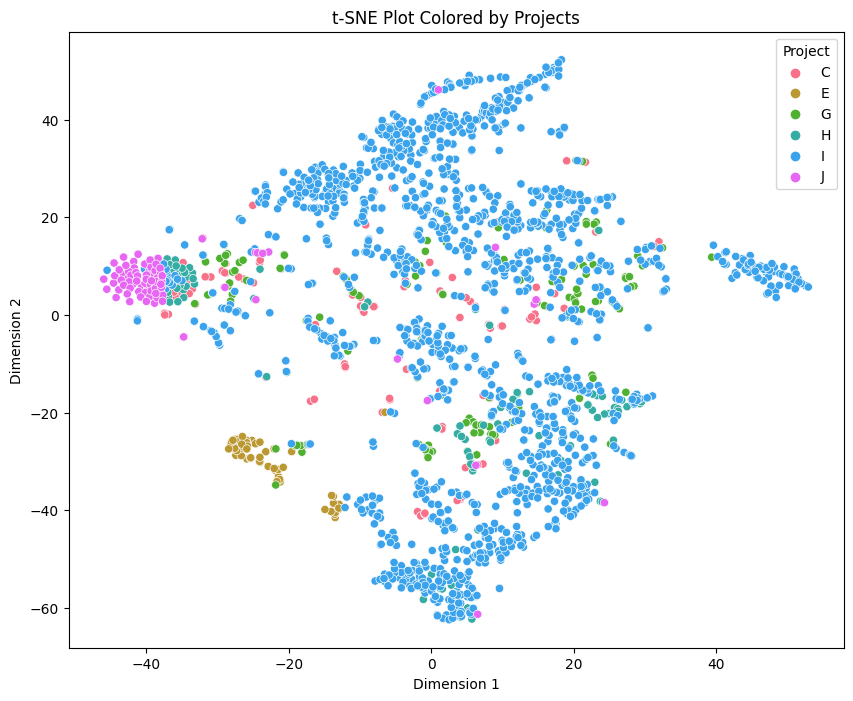

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
tsne = TSNE(n_components=2, random_state
tsne_result = tsne.fit_transform(df)
tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Project'] = projectTrain
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Project', data=tsne_df, palette='husl', legend='full')
plt.title('t-SNE Plot Colored by Projects')
plt.show()

**Biomarker Discovery**

In this section, our focus is on exploring the key features, encompassing both microbial and clinical aspects, that play a pivotal role in the occurrence of preterm births.

**RF feature ranking**


In [ ]:
warnings.filterwarnings("ignore")
df = pd.DataFrame(train_scaled, columns=trainColumns)
classifier = learn_RF_classifier(df, lableTrain, 50)
feature_importances = classifier.feature_importances_
feature_importance_dict = dict(zip(df.columns, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
counter = 0
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")
    counter= counter+1
    if counter == 11:
      break

Lactobacillaceae: 0.07946548585603647
Prevotellaceae: 0.07362341421187357
Bifidobacteriaceae: 0.06684007429258418
Veillonellaceae: 0.055503924887259665
Lachnospiraceae: 0.05124010147906622
Mycoplasmataceae: 0.048585992242147595
Peptoniphilaceae: 0.04674665933822823
Alcaligenaceae: 0.03895150428720591
Atopobiaceae: 0.035253668903315286
Pseudomonadaceae: 0.034067801085505056
Leptotrichiaceae: 0.03206524158389592



**SVM feature ranking**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
warnings.filterwarnings("ignore")
X_train = df
y_train = lableTrain
svm_model = LinearSVC(C=1)
selector = RFE(svm_model, n_features_to_select=1)
selector = selector.fit(X_train, y_train.values.ravel())
feature_ranking_svm = selector.ranking_
feature_ranking_df_svm = pd.DataFrame({'Feature': X_train.columns, 'Ranking': feature_ranking_svm})
sorted_feature_ranking_df_svm = feature_ranking_df_svm.sort_values(by='Ranking')
print(sorted_feature_ranking_df_svm[0:10])


                                      Feature  Ranking
17                         Enterobacteriaceae        1
18                            Enterococcaceae        2
36                             Prevotellaceae        3
21                          Flavobacteriaceae        4
11  Clostridiales Family XIII. Incertae Sedis        5
41                           Streptococcaceae        6
29                           Mycoplasmataceae        7
4        Bacillales Family XI. Incertae Sedis        8
40                          Staphylococcaceae        9
12                          Coriobacteriaceae       10



Discussion:

In this project, we highlight the potential of the vaginal microbiome as a predictive biomarker for preterm birth, underscoring its significance in prenatal care. The identification of such biomarkers opens avenues for targeted interventions, particularly for populations at a higher risk of preterm birth.

While acknowledging the strengths of our methodology, which includes the use of robust statistical methods and machine learning techniques for biomarker discovery, aligning with existing literature, we remain mindful of the study's limitations. Notably, the presence of potential biases has been identified as a factor contributing to lower model performance. A comprehensive exploration of these biases revealed non-biological factors. Addressing these factors in future analyses has the potential to enhance the accuracy of our predictive models.


Future Work:
**bold text**
The study opens several avenues for future research. This includes exploring additional variables that may influence preterm birth, applying our model to different populations, and integrating our findings into clinical practice.
Future endeavors could prioritize the refinement and validation of the predictive model by incorporating larger and more diverse datasets, including aspects like alpha diversity. Insights into diversity metrics can be gleaned through informative visualizations such as PCoA plots. This not only has the potential to augment the accuracy of the model but also provides valuable insights into the dataset.

To address potential biases, the utilization of approaches for bias mitigation before the application of machine learning models should be considered. Additionally, given the high dimensionality of the data, employing dimension reduction techniques and neural networks, such as autoencoders, may further enhance model performance.
